In [1]:
import sys
sys.path.append("../")

In [2]:
from sentinelhub import DataCollection, SHConfig

config = SHConfig()
# From aws console access tokens
config.aws_access_key_id = ''
config.aws_secret_access_key = ''
config.save()

In [3]:
from sentinelhub import AwsTile

# https://www.fire.ca.gov/incidents/2020/9/27/glass-fire/
# https://mundiwebservices.com/geodata/S2_MSI_L1C?x=-122.377887&y=38.433934&start=2020-09-26T02:08:27Z&end=2020-09-30T12:29:43Z&z=9&S2_MSI_L1C_visible=true&S2_MSI_L1C_search=true
tile_name = "10SEH"
time = "2020-09-29"

In [4]:
from sentinelhub import AwsTileRequest

bands = ["B02", "B03", "B04"]
metafiles = ['tileInfo', 'preview']
data_folder = 'awsdata'

request = AwsTileRequest(
    tile=tile_name,
    time=time,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder,
    data_collection=DataCollection.SENTINEL2_L1C,
)

request.save_data()

/Users/bd92eu/.pyenv/versions/satellite/lib/python3.9/site-packages/sentinelhub/aws.py:165: SHUserWarning: Products with baseline 02.09 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


In [5]:
data_list = request.get_data()
b02, b03, b04, info, preview = data_list

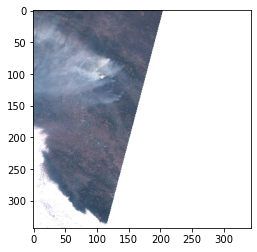

In [6]:
import matplotlib.pyplot as plt

plt.imshow(preview);

In [7]:
preview.shape

(343, 343, 3)

In [8]:
import numpy as np

# b02 = blue, b03 = green, b04 = red
rgb = np.dstack([b04, b03, b02])
rgb.shape

(10980, 10980, 3)

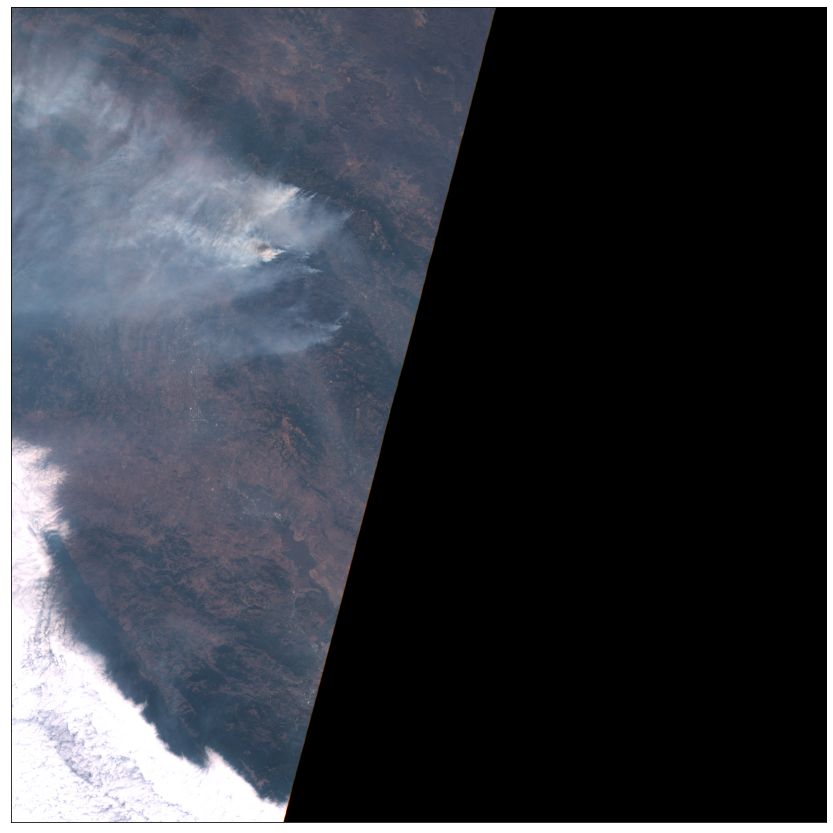

In [9]:
from ds_exploration.plotting_utils import plot_image

plot_image(rgb, factor=5/2e4, clip_range=(0,1))